In [1]:
import sys
sys.path.append('../')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import numpy as np
from sklearn.cluster import KMeans
from tslearn.clustering import TimeSeriesKMeans
from tslearn.metrics import dtw
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from fastdtw import fastdtw


c:\Users\davi_\OneDrive\Documentos\GitHub\estudo_benchmark\env\lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [3]:
path = "../data/final/05_returns_merge_rw_12M.csv"

In [4]:
path2 = "../data/final/06_vol_merge_rm_12M.csv"

In [5]:
path_load = "../reports/figures/"

In [6]:
df = pd.read_csv(path)
df2 = pd.read_csv(path2)

In [7]:
df2.drop(columns=["Unnamed: 0",'data'],inplace=True)
df2 = df2[["Volatilidade_CDI","Volatilidade_IMAB5","Volatilidade_IMAB","Volatilidade_IHFA","Volatilidade_IBOV","Volatilidade_port1","Volatilidade_port4","Volatilidade_port8"]]

In [8]:
def distance_using_fastdtw_returns(df):
  
  series_y = df["Variação_12_Meses_(%)_port1"].values
  series_z = df["Variação_12_Meses_(%)_port4"].values
  series_a = df["Variação_12_Meses_(%)_port8"].values
  
  portfolios = ["Port1","Port4","Port8"]
  lista_benchmark = ["CDI","IMAB5","IMAB","IHFA","IBOV"]
  series_portfolios = [series_y,series_z,series_a]
  x= []
  lista = []
  
  for benchmark in lista_benchmark:
    i = 0
    series_x = np.array(df[f'Variação_12_Meses_(%)_{benchmark}'])
    for series in series_portfolios:
      lista.append(f'{benchmark}x{portfolios[i]}')
      x.append(round(fastdtw(series_x,series)[0],4))
      #x.append(round(fastdtw(series_x,series)[0],4))
      #print(f'Distancia {benchmark} x {portfolios[i]}: {round(fastdtw(series_x,series)[0],4)}')
      i= i+1
  return x,lista

In [9]:
def distance_using_fastdtw_vol(df):
  
  series_y = df["Volatilidade_port1"].values
  series_z = df["Volatilidade_port4"].values
  series_a = df["Volatilidade_port8"].values
  
  portfolios = ["Port1","Port4","Port8"]
  lista_benchmark = ["CDI","IMAB5","IMAB","IHFA","IBOV"]
  series_portfolios = [series_y,series_z,series_a]
  x= []
  lista = []
  
  for benchmark in lista_benchmark:
    i = 0
    series_x = np.array(df[f'Volatilidade_{benchmark}'])
    for series in series_portfolios:
      #lista.append(f'{benchmark}x{portfolios[i]}')
      x.append(round(fastdtw(series_x,series)[0],4))
      #x.append(round(fastdtw(series_x,series)[0],4))
      #print(f'Distancia {benchmark} x {portfolios[i]}: {round(fastdtw(series_x,series)[0],4)}')
      i= i+1
  return x

In [10]:
def replace_values(df):
  old_values = df["Cluster"].unique()
  new_values = ["Grupo1","Grupo2","Grupo3"]
  df.replace(old_values,new_values,inplace=True)
  
  return df

In [11]:
x = distance_using_fastdtw_returns(df)
y = distance_using_fastdtw_vol(df2)

In [12]:
df_teste = pd.DataFrame(x[0])
df_teste.columns = ["DTW_Returns"]
df_teste["benchmark"] =x[1] 
df_teste["DTW_Volatility"] = y

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df_teste.copy()
df_scaled.iloc[:,[0,2]] = pd.DataFrame(scaler.fit_transform(df_scaled.iloc[:,[0,2]]),columns=df_scaled.iloc[:,[0,1]].columns)

In [15]:
series = df_teste[["DTW_Returns"]]
series2 = df_teste[["DTW_Returns","DTW_Volatility"]]

In [17]:
num_clusters=3
kmodel = KMeans(n_clusters=num_clusters,random_state=42)
clusters = kmodel.fit(series2)

c:\Users\davi_\OneDrive\Documentos\GitHub\estudo_benchmark\env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [18]:
df_teste["Cluster"] = clusters.labels_
#df_scaled["Cluster"] = clusters.labels_


In [19]:
df_teste = replace_values(df_teste)
#df_scaled = replace_values(df_scaled)

In [20]:
groups1 = df_teste.groupby("Cluster")
groups2 =df_teste.groupby("benchmark")
# groups1 = df_scaled.groupby("Cluster")
# groups2 =df_scaled.groupby("benchmark")

C:\Users\davi_\AppData\Local\Temp\ipykernel_10244\3047068981.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


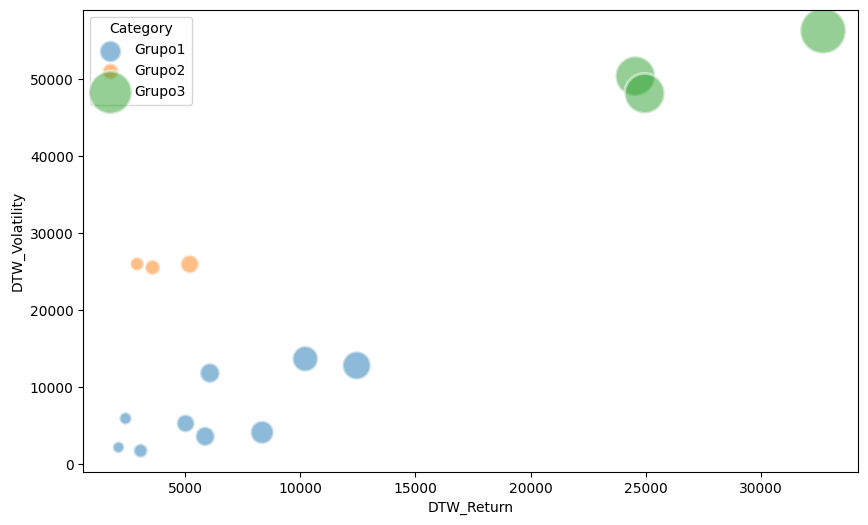

In [21]:
fig,ax=plt.subplots(figsize=(10,6))
for i,(name,group) in enumerate(groups1):
  ax.scatter(
    group["DTW_Returns"],
    group["DTW_Volatility"],
    s=group["DTW_Returns"]/30,
    cmap="Blues",
    label=name,
    alpha=0.5,
    edgecolors='White',
    linewidth=2
  );
# Set the axis labels and legend
ax.set_xlabel('DTW_Return')
ax.set_ylabel('DTW_Volatility')
ax.legend(title='Category')
fig.savefig(path_load+"K_means_Clusters.png");

C:\Users\davi_\AppData\Local\Temp\ipykernel_10244\2027936656.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


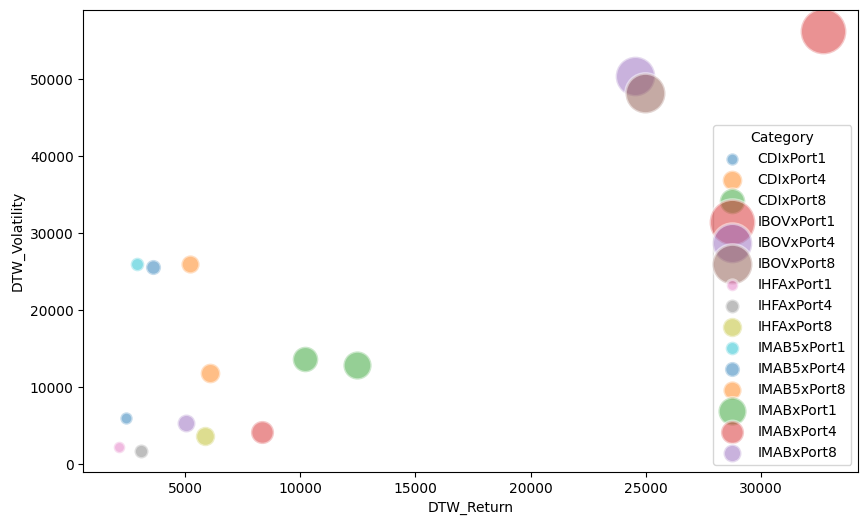

In [22]:
fig,ax=plt.subplots(figsize=(10,6))
for i,(name,group) in enumerate(groups2):
  ax.scatter(
    group["DTW_Returns"],
    group["DTW_Volatility"],
    s=group["DTW_Returns"]/30,
    cmap="Blues",
    label=name,
    alpha=0.5,
    edgecolors='White',
    linewidth=2
  );
# Set the axis labels and legend
ax.set_xlabel('DTW_Return')
ax.set_ylabel('DTW_Volatility')
ax.legend(title='Category')
fig.savefig(path_load+"K_means_Benchmarks.png");